# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [10]:
import numpy as np
import matplotlib as plt
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [2]:
ds.sort_values(by="price",ascending=False)[["address","price"]].iloc[0,:].values

array(['El Escorial', 8500000], dtype=object)

#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [3]:
df = pd.DataFrame(ds)
the_cheapest_house = df[df["price"] > 0]

the_cheapest_house.sort_values(by="price")[["address","price"]].iloc[0,:].values

array(['Berlin, Coslada', 600], dtype=object)

#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [4]:
the_biggest_house = ds[["address","surface"]][ds["surface"] == ds["surface"].max()].reset_index(drop=True).values
print(the_biggest_house)

the_smallest_house = ds[["address","surface"]][ds["surface"] == ds["surface"].min()].reset_index(drop=True).values
print(the_smallest_house)

[['Sevilla la Nueva' 249000.0]]
[['Calle Amparo,  Madrid Capital' 15.0]]


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [6]:
print(sorted(ds.level5.unique()))

[' Madrid Capital', 'Ajalvir', 'Alcalá de Henares', 'Alcobendas', 'Alcorcón', 'Aldea del Fresno', 'Algete', 'Alpedrete', 'Ambite', 'Anchuelo', 'Aranjuez', 'Arganda del Rey', 'Arroyomolinos (Madrid)', 'Batres', 'Becerril de la Sierra', 'Belmonte de Tajo', 'Boadilla del Monte', 'Braojos', 'Brea de Tajo', 'Brunete', 'Buitrago del Lozoya', 'Bustarviejo', 'Cabanillas de la Sierra', 'Cadalso de los Vidrios', 'Camarma de Esteruelas', 'Campo Real', 'Canencia', 'Carabaña', 'Casarrubuelos', 'Cenicientos', 'Cercedilla', 'Chapinería', 'Chinchón', 'Ciempozuelos', 'Cobeña', 'Collado Mediano', 'Collado Villalba', 'Colmenar Viejo', 'Colmenar de Oreja', 'Colmenar del Arroyo', 'Colmenarejo', 'Corpa', 'Coslada', 'Cubas de la Sagra', 'Daganzo de Arriba', 'El Atazar', 'El Berrueco', 'El Boalo - Cerceda – Mataelpino', 'El Escorial', 'El Molar (Madrid)', 'El Vellón', 'El Álamo', 'Estremera', 'Fresnedillas de la Oliva', 'Fresno de Torote', 'Fresno de Torote - Serracines', 'Fuenlabrada', 'Fuente El Saz de Jara

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [7]:
ds.apply(lambda x: pd.Series(x.dropna()))

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [6]:
original_shape = ds.shape
ds_withoutNA = ds.dropna()
withoutNa_ds = ds_withoutNA.shape

print("Original dimensions:", original_shape)
print("Dimensions after deletions:", withoutNa_ds)


Original dimensions: (15335, 38)
Dimensions after deletions: (0, 38)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [7]:
arroyomolinos_prices = ds[ds['level5'] == 'Arroyomolinos (Madrid)']['price']

mean_price_arroyomolinos = arroyomolinos_prices.mean()

print(mean_price_arroyomolinos)


294541.59854014596


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

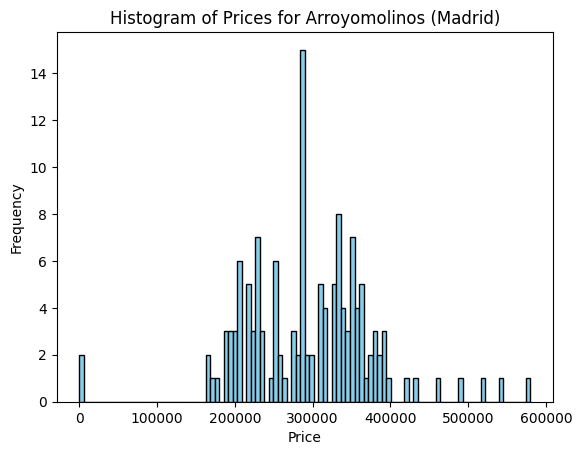

In [6]:
import matplotlib.pyplot as plt

arroyomolinos_prices = ds[ds['level5'] == 'Arroyomolinos (Madrid)']['price']


plt.hist(arroyomolinos_prices, bins=100, color='skyblue', edgecolor= "black")

plt.title('Histogram of Prices for Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()


**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 09. Are the averages of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [8]:
mean_price_valdemorillo = ds[ds['level5']=='Valdemorillo']['price'].mean()
mean_price_galapagar = ds[ds['level5']=='Galapagar']['price'].mean()
print("Mean house price of Valdemorillo: €" + str(mean_price_valdemorillo.round(-4)) + "\nMean house price of Galapagar: €" + str(mean_price_galapagar.round(-4)))

"""Given the context of the data, we can conclude that the average house prices are the same when rounded to the nearest ten thousand"""

Mean house price of Valdemorillo: €360000.0
Mean house price of Galapagar: €360000.0


'Given the context of the data, we can conclude that the average house prices are the same when rounded to the nearest ten thousand'

#### Exercise 10. Are the averages of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [9]:
ds['ppm2'] = ds['price'] / ds["surface"]

avg_valdemorillo_ppm2 = ds[ds['level5'] == 'Valdemorillo']['ppm2'].mean()

avg_galapagar_ppm2 = ds[ds['level5'] == 'Galapagar']['ppm2'].mean()

print("Average price per square meter in Valdemorillo:", round(avg_valdemorillo_ppm2,2))
print("Average price per square meter in Galapagar:", round(avg_galapagar_ppm2,2))

if avg_valdemorillo_ppm2 == avg_galapagar_ppm2:
    print("The averages of price per square meter in Valdemorillo and Galapagar are the same.")
else:
    print("The averages of price per square meter in Valdemorillo and Galapagar are different.")


Average price per square meter in Valdemorillo: 1317.95
Average price per square meter in Galapagar: 1606.32
The averages of price per square meter in Valdemorillo and Galapagar are different.


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

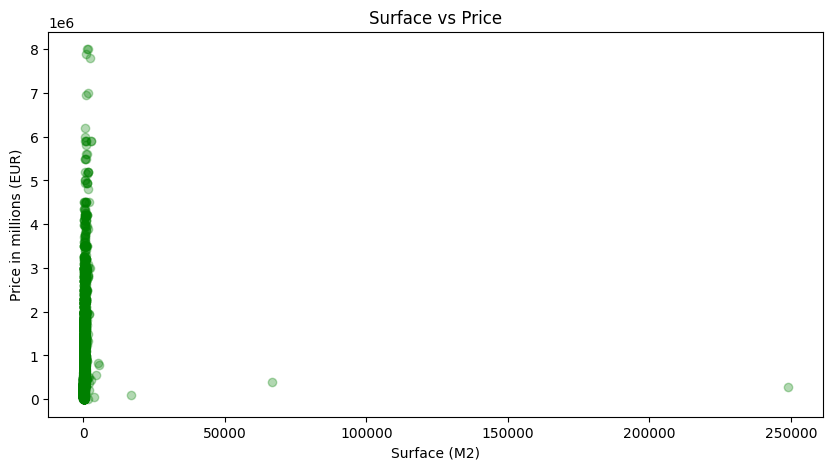

In [12]:
import matplotlib.pyplot as plt

fotocasa = ds.loc[(ds['surface']>0) & (ds['surface']<10000)]
#Outliers_of_chart = ds.nlargest(3, 'surface').index
#ds = ds.drop(Outliers_of_chart)

plt.figure(figsize=(10, 5))
plt.scatter(ds['surface'], ds['price'], alpha=[0.3], color='green')
plt.title('Surface vs Price')
plt.xlabel('Surface (M2)')
plt.ylabel('Price in millions (EUR)')
plt.show()


**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [13]:
agencies_comprehension = {el for el in ds['realEstate_name']}
unique = ds['realEstate_name'].unique()
print('there are ' + str(len(agencies_comprehension)) + ' real estate agencies in Madrid')
print(len(unique))

there are 1822 real estate agencies in Madrid
1822


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [14]:
population_counts = ds['level5'].value_counts()

most_houses_population = population_counts.idxmax()
most_houses_count = population_counts.max()

print(f"The population with the most houses is {most_houses_population} with {most_houses_count} houses.")


The population with the most houses is  Madrid Capital with 6643 houses.


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [8]:
south_belt = ["Fuenlabrada","Leganés","Getafe","Alcorcón"]

south_belt_ds = ds[ds['level5'].isin(south_belt)] 
print(south_belt_ds.head())

     Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
1             2       153867863  False  tecnocasa fuenlabrada ferrocarril   
3             4       152776331  False  tecnocasa fuenlabrada ferrocarril   
85           86       153152077  False            sinergical inmobiliaria   
94           95       153995577  False                    viviendas365com   
109         110       153586414  False    area uno asesores inmobiliarios   

     phone_realEstate                                       url_inmueble  \
1         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
3         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
85                NaN  https://www.fotocasa.es/es/comprar/vivienda/le...   
94        911226014.0  https://www.fotocasa.es/es/comprar/vivienda/le...   
109       912664081.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   

     rooms  bathrooms  surface   price  ... level4Id level5Id level6Id  \
1     

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

level5
Alcorcón       179500.0
Fuenlabrada    155000.0
Getafe         285305.0
Leganés        169950.0
Name: price, dtype: float64


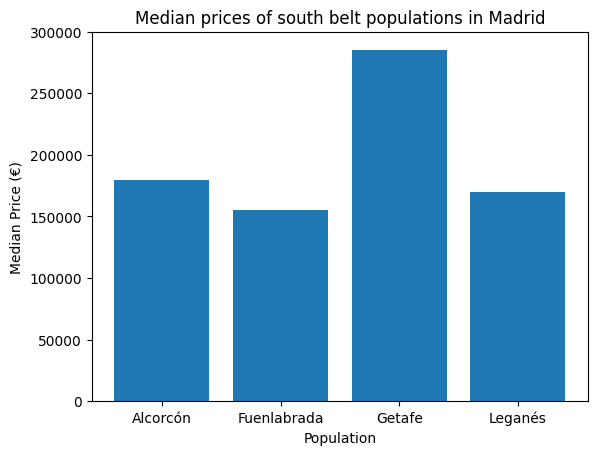

'The median price of Getafe is far higher than the next highest (Alcorcón)'

In [19]:
import matplotlib.pyplot as plt
median_values = south_belt_ds.groupby('level5')['price'].median()
print(median_values)
plt.bar(median_values.index, median_values)
plt.ylim(0,300000)
plt.xlabel('Population')
plt.ylabel('Median Price (€)')
plt.title('Median prices of south belt populations in Madrid')
plt.show()

"""The median price of Getafe is far higher than the next highest (Alcorcón)"""

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [20]:
mean_price = south_belt_ds['price'].mean()
mean_rooms = south_belt_ds['rooms'].mean()
mean_surface = south_belt_ds['surface'].mean()
mean_bathrooms = south_belt_ds['bathrooms'].mean()

var_price = south_belt_ds['price'].var()
var_rooms = south_belt_ds['rooms'].var()
var_surface = south_belt_ds['surface'].var()
var_bathrooms = south_belt_ds['bathrooms'].var()

means = [mean_price, mean_rooms, mean_surface, mean_bathrooms]
variance = [var_price, var_rooms, var_surface, var_bathrooms]

print(means)
print(variance)

[223094.48070562293, 3.0177383592017737, 111.75222363405337, 1.633221850613155]
[14921367508.04902, 0.7188858892927542, 4263.051760316337, 0.5717968625577321]


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [21]:
south_belt_grouped_ds = south_belt_ds.sort_values(by = 'price', ascending=False).groupby('level5')
max_prices = {}

for price, group_df in south_belt_grouped_ds: #price, group_df is a tuple
    max_value_row = group_df.loc[group_df['price'].idxmax()]  # Get the row with the maximum value
    max_value = max_value_row['price']  # Maximum value
    corresponding_address = max_value_row['address'] # its address
print(f"The maximum price for population '{price}' is {max_value}€. Its address is {corresponding_address}.")

The maximum price for population 'Leganés' is 650000€. Its address is Avenida Reina Sofía, Leganés.


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

level5         
Alcorcón  5585     5.700841
          13275    3.008511
          1903     2.951497
          6552     2.357601
          6678     2.317216
                     ...   
Leganés   8663    -1.078158
          15238   -1.088236
          4941    -1.134960
          10990   -1.160612
          189     -1.362168
Name: price, Length: 907, dtype: float64


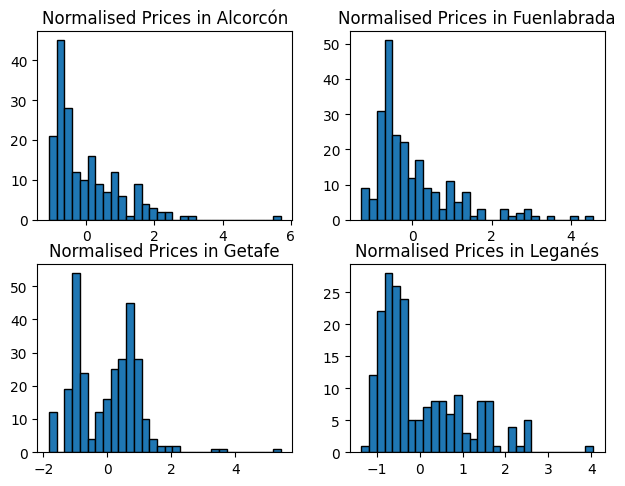

In [30]:
import numpy as np

def standard_normalisation(column):
    mean = column.mean()
    std = column.std()
    return (column - mean)/std
normalised_df = south_belt_grouped_ds['price'].apply(standard_normalisation)

x = np.random.randn(1000, 3)
print(normalised_df)


fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,ncols=2)

plt.tight_layout()

ax0.hist(normalised_df['Alcorcón'], bins = 30, edgecolor='black')
ax0.set_title('Normalised Prices in Alcorcón')

ax1.hist(normalised_df['Fuenlabrada'], bins = 30, edgecolor='black')
ax1.set_title('Normalised Prices in Fuenlabrada')
ax2.hist(normalised_df['Getafe'], bins=30, edgecolor='black')
ax2.set_title('Normalised Prices in Getafe')

ax3.hist(normalised_df['Leganés'], bins=30, edgecolor='black')
ax3.set_title('Normalised Prices in Leganés')

plt.show()

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

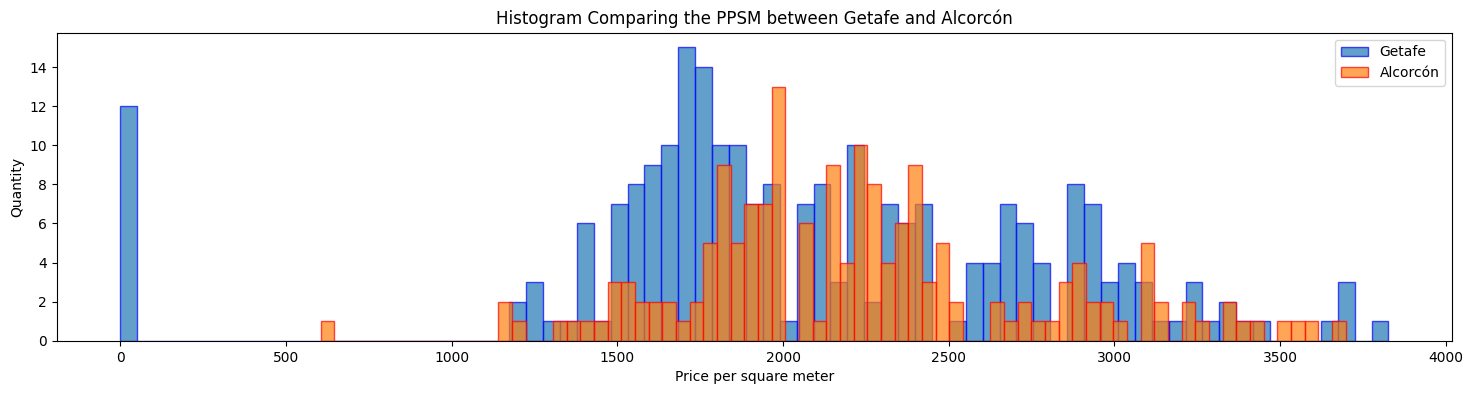

In [32]:

plt.figure(figsize=(18,4))
plt.title("Histogram Comparing the PPSM between Getafe and Alcorcón")
plt.xlabel("Price per square meter")
plt.ylabel("Quantity")
plt.ticklabel_format(style='plain')
plt.hist(south_belt_ds[south_belt_ds["level5"] == "Getafe"]["pps"], label= "Getafe", alpha = .7,bins = 75, edgecolor = "blue")
plt.hist(south_belt_ds[south_belt_ds["level5"] == "Alcorcón"]["pps"], label= "Alcorcón", alpha = .7,bins = 75, edgecolor="red")
plt.legend()

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

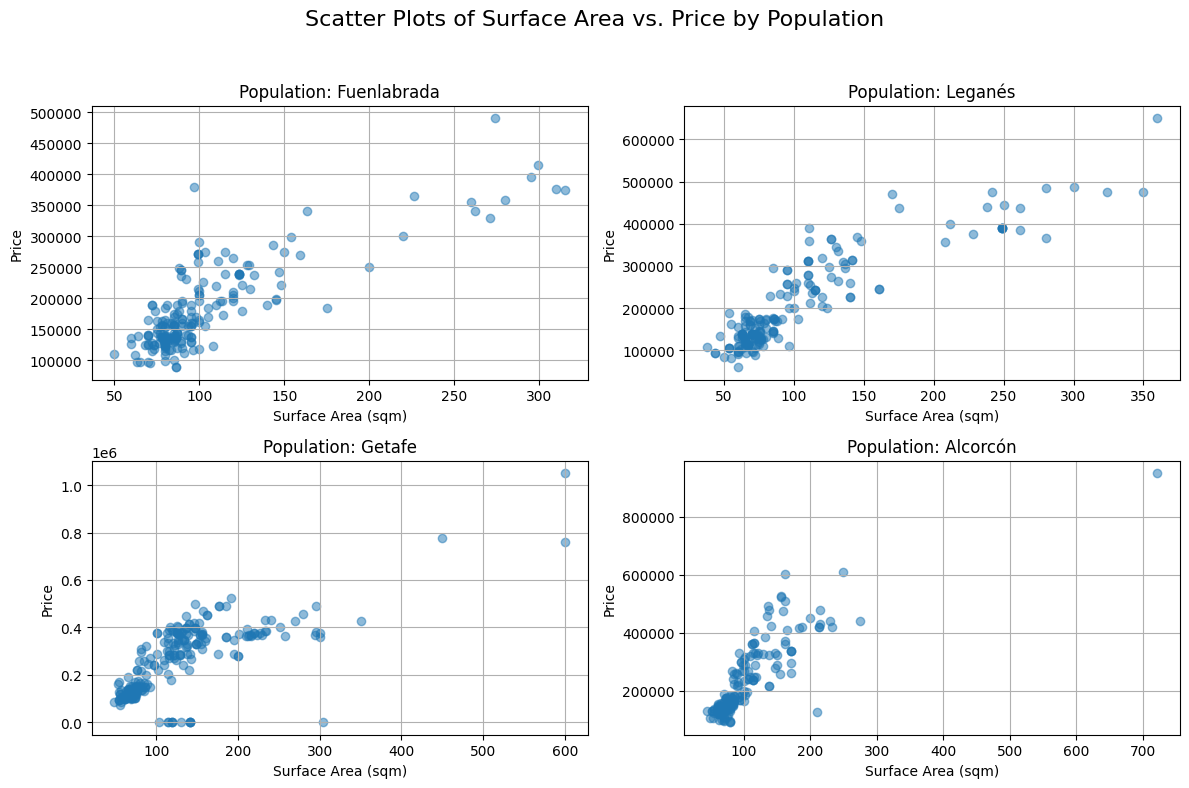

In [34]:
populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]  


fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Scatter Plots of Surface Area vs. Price by Population", fontsize=16)

for i, population in enumerate(populations):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    
    population_data = ds[ds['level5'] == population] #creates a dataframe where the populations are those found only in the populations list defined above.
    ax.scatter(population_data['surface'], population_data['price'], alpha=0.5)
    ax.set_title(f"Population: {population}")
    ax.set_xlabel("Surface Area (sqm)")
    ax.set_ylabel("Price")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [38]:
from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center=(60, -2.2), zoom=2, min_zoom=1, max_zoom=20, basemap=basemaps.Stadia.StamenTerrain) #"Stamen.Terrain" was deprecated, had to change it to "".Stadia.StamenTerrain"
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [41]:
## HERE: plot the coordinates of the estates
#ds_ex15[["latitude", "longitude"]]


positions = {"latitude": south_belt_ds["latitude"],
             "longitude": south_belt_ds["longitude"],
             "population": south_belt_ds["level5"]
             }
positions = pd.DataFrame(positions)

#Latitudes and Longitudes decimals were separated by commas, I had to change them to decimal points.
positions['latitude'] = positions['latitude'].str.replace(',', '.').astype(float)
positions['longitude'] = positions["longitude"].str.replace(',', '.').astype(float)

#I have taken the liberty to center the map in Madrid
map = Map(center=(40.3168, -3.7943), zoom=11, min_zoom=1, max_zoom=20, basemap=basemaps.Stadia.StamenTerrain)

                    


## PUT HERE YOUR CODE:

from ipyleaflet import CircleMarker, LayerGroup, LegendControl

colors = {"Fuenlabrada": "red", "Leganés": "green", "Getafe": "blue", "Alcorcón": "yellow"}
layer_group = LayerGroup()

for row in positions.index:
    mark = CircleMarker()
    mark.location = (positions.loc[row]["latitude"],positions.loc[row]["longitude"])
    mark.radius = 3
    mark.color = colors.get(positions.loc[row]["population"], "black")
    mark.fill_color = colors.get(positions.loc[row]["population"], "black")
    mark.weight = 1
    layer_group.add_layer(mark)

legend = LegendControl(colors, title="Populations", position="topright")
map.add(legend)
map.add_layer(layer_group)
map

Map(center=[40.3168, -3.7943], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…